<a href="https://colab.research.google.com/github/Ether-silicon/OAS5033_Big_Data_Analytics/blob/main/Activity_4_Analytic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OAS5033 Big Data Analytics - Activity 4 Analytic Programming
* Prepared by: Teh Yoong Sin 24002113
* Date: 31/10/2024
* Dataset: Provided in Activity 4 - Hospital services vs patient's complaints

---
## Questions background

The hospital administration has gathered data on patient complaints to identify key areas requiring improvement, as shown in Table 1. This data captures the volume of complaints across various hospital service categories. Hospital management aims to prioritize actions that will enhance patient satisfaction, with a focus on addressing the most critical concerns to significantly improve the patient experience.

#####_Table 1: Hospital Services VS Patients’ Complaints_ <a id="target-heading-5"></a>

| Hospital Services                    | No. of Complaints   |
|:-------------------------------------|:--------------------|
| Charge extra fee                     | 77                  |
| Unhygienic environment               | 87                  |
| Limited number of specialist doctors | 320                 |
| Unfriendly staff                     | 83.5                |
| Doctors not always available         | 33.5                |


## Q1: How can we group similar complaints to identify key problem areas in hospital services?

### Answer Q1:
We can group similar complaints by categorizing them based on common themes, such as:
* Staff Behavior,
* Availability,
* Environment,
* Charges.

In Python, we could add a new column to represent these categories.

In [2]:
import pandas as pd

# Create a list of lists for the data
data = [
    ["Charge extra fee", 77],
    ["Unhygienic environment", 87],
    ["Limited number of specialist doctors", 320],
    ["Unfriendly staff", 83.5],
    ["Doctors not always available", 33.5]
]

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=["Hospital Services", "No. of Complaints"])

print(df)

                      Hospital Services  No. of Complaints
0                      Charge extra fee               77.0
1                Unhygienic environment               87.0
2  Limited number of specialist doctors              320.0
3                      Unfriendly staff               83.5
4          Doctors not always available               33.5


We can group similar complaints such as "Limited no. of specialist doctors" and "Doctors not always available" as "Availability category.

In [3]:
# Define categories for each service
df['Category'] = [
    'Charges',        # Charge extra fee
    'Environment',    # Unhygienic environment
    'Availability',   # Limited number of specialist doctors
    'Staff Behavior', # Unfriendly staff
    'Availability'    # Doctors not always available
]

# Group by category and sum the complaints
grouped_df = df.groupby('Category')['No. of Complaints'].sum().reset_index()
grouped_df

,Category,No. of Complaints
0,Availability,353.5
1,Charges,77.0
2,Environment,87.0
3,Staff Behavior,83.5


This will give us the total number of complaints per category, helping to identify the key problem areas.

## Q2: Can we predict the frequency of complaints for each category in the future?

### Answer Q2:
In fact we can predict the frequency of complaints for each category in future using series or regression model because this is numerical prediction problem. However, this data in [Table 1](#target-heading-5) is not sufficient to perform linear regression model. Table 1 data is aggregated over 2 columns. Given the raw dataset, we could potentially predict the frequecy of complaints for each category.

## Q3: Are there any unusual patterns or outliers in the frequency of complaints that might require attention?

### Answer Q3:
The complaints frequency in Table 1 should be in `integer` data format, and not `real`. It doesnt make sense that the complaints in decimal points where half complaint is made. This may be an error in data collection or reporting.

The number of complaints for `Limited number of specialist doctors` is at extreme high side recording 320 commplaints. If the complaints data is valid, hospital management need more attention on this issue and address as priority tasks.

Below is data visualization for the data in Table 1.

In [4]:
# Find the max complaint category
max_complaint_service = df[df['No. of Complaints'] == df['No. of Complaints'].max()]
print("Service with the highest complaint count:")
print(max_complaint_service)

Service with the highest complaint count:
                      Hospital Services  No. of Complaints      Category
2  Limited number of specialist doctors              320.0  Availability


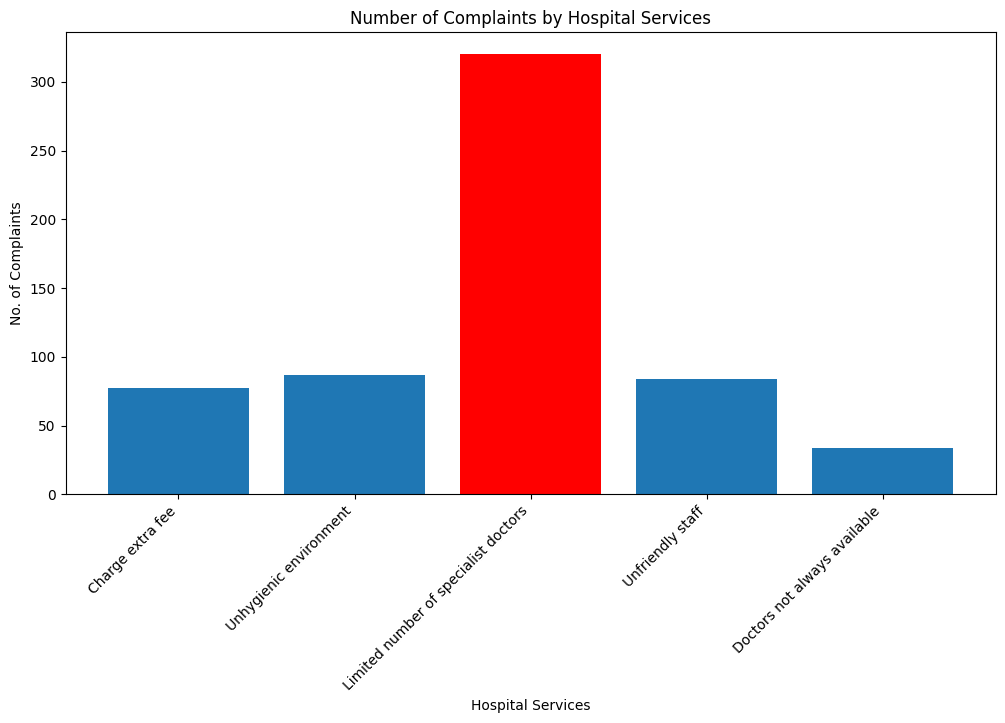

In [7]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df['Hospital Services'], df['No. of Complaints'])
plt.xlabel('Hospital Services')
plt.ylabel('No. of Complaints')
plt.title('Number of Complaints by Hospital Services')
plt.xticks(rotation=45, ha='right')

# Highlight the highest complaint count in red
plt.bar(max_complaint_service['Hospital Services'], max_complaint_service['No. of Complaints'], color='red')
plt.show()